## LSTM (Using Autoregressive Multi-Step Approach)

* Predict future steps recursively using model’s previous output as input.

* Feedback loop is used where predictions become inputs for the next step. 

In [9]:
import pandas as pd
import numpy as np

# Load the training and testing datasets
train_data = pd.read_csv('training_1.csv')
test_data = pd.read_csv('testing_1.csv')

# Check the column names and structure
print("Training Data Columns:", train_data.columns)
print("Testing Data Columns:", test_data.columns)

# Normalize `IP Delay (ms)` in the training data if not already normalized
if 'Normalized IP Delay' not in train_data.columns:
    min_train = train_data['IP Delay (ms)'].min()
    max_train = train_data['IP Delay (ms)'].max()
    train_data['Normalized IP Delay'] = (train_data['IP Delay (ms)'] - min_train) / (max_train - min_train)

if 'Normalized IP Delay' not in test_data.columns:
    min_test = test_data['IP Delay (ms)'].min()
    max_test = test_data['IP Delay (ms)'].max()
    test_data['Normalized IP Delay'] = (test_data['IP Delay (ms)'] - min_test) / (max_test - min_test)

print("Training Data Head:\n", train_data.head())
print("Testing Data Head:\n", test_data.head())

Training Data Columns: Index(['SN', 'IP Delay (ms)'], dtype='object')
Testing Data Columns: Index(['SN', 'IP Delay (ms)'], dtype='object')
Training Data Head:
    SN  IP Delay (ms)  Normalized IP Delay
0   1      19.265890             0.609268
1   2      19.082069             0.572774
2   3      19.102097             0.576750
3   4      19.090891             0.574525
4   5      18.964052             0.549344
Testing Data Head:
    SN  IP Delay (ms)  Normalized IP Delay
0   1      16.572952             0.083876
1   2      16.433954             0.056573
2   3      16.265154             0.023416
3   4      16.330004             0.036154
4   5      21.164894             0.985857


In [10]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])  # Sequence of delays
        y.append(data[i+sequence_length])   # Target value (next step)
    return np.array(X), np.array(y)

# Define sequence length (number of previous steps to consider)
sequence_length = 10  # Adjust as needed

# Generate sequences for training data
train_values = train_data['Normalized IP Delay'].values
X_train, y_train = create_sequences(train_values, sequence_length)

# Reshape training input for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Add feature dimension

# Generate sequences for testing data
test_values = test_data['Normalized IP Delay'].values
X_test, y_test = create_sequences(test_values, sequence_length)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Display the shapes of training and testing datasets
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)


X_train Shape: (190, 10, 1)
y_train Shape: (190,)
X_test Shape: (540, 10, 1)
y_test Shape: (540,)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the RNN model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),  # RNN layer with 50 units
    Dense(1)  # Output layer for predicting one value
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Use Mean Squared Error as the loss function
model.summary()


c:\ML\PYTHON\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.2513 - val_loss: 0.0628
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1901 - val_loss: 0.0427
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1609 - val_loss: 0.0244
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1010 - val_loss: 0.0100
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0698 - val_loss: 0.0050
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0412 - val_loss: 0.0188
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0443 - val_loss: 0.0317
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0428 - val_loss: 0.0197
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - val_loss: 0.0107
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0392 - val_loss: 0.0075
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0455 - val_loss: 0.0073
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0384 - val_loss: 0.0088
E

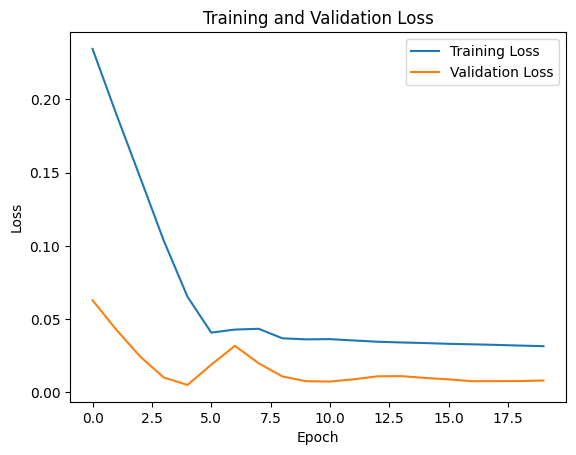

In [12]:
# Train the RNN model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [13]:
# Multi-step iterative prediction
def multi_step_prediction(initial_sequence, model, future_steps):
    current_sequence = initial_sequence
    predicted_delays = []

    for _ in range(future_steps):
        # Predict the next delay
        next_delay = model.predict(current_sequence.reshape(1, current_sequence.shape[0], 1))
        predicted_delays.append(next_delay.flatten()[0])  # Save prediction

        # Update the sequence: remove oldest value and append new prediction
        current_sequence = np.append(current_sequence[1:], next_delay).reshape(-1, 1)

    return predicted_delays

# Select the starting sequence (e.g., the first sequence in X_test)
starting_sequence = X_test[0]

# Number of future steps to predict
future_steps = 10

# Perform multi-step prediction
predicted_delays = multi_step_prediction(starting_sequence, model, future_steps)
print("Predicted delays for future steps:", predicted_delays)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted delays for future steps: [np.float32(0.70099235), np.float32(0.7178929), np.float32(0.73902285), np.float32(0.7619781), np.float32(0.7857927), np.float32(0.7700009), np.float32(0.7532301), np.float32(0.73670465), np.float32(0.7206311), np.float32(0.7040757)]


In [14]:
# Denormalize predictions
denormalized_predictions = (np.array(predicted_delays) * (test_data['IP Delay (ms)'].max() - test_data['IP Delay (ms)'].min())) + test_data['IP Delay (ms)'].min()
print("Denormalized Predicted Delays:", denormalized_predictions)


Denormalized Predicted Delays: [19.71466292 19.80070276 19.9082744  20.02513841 20.14637749 20.06598203
 19.98060279 19.89647253 19.81464299 19.7303601 ]


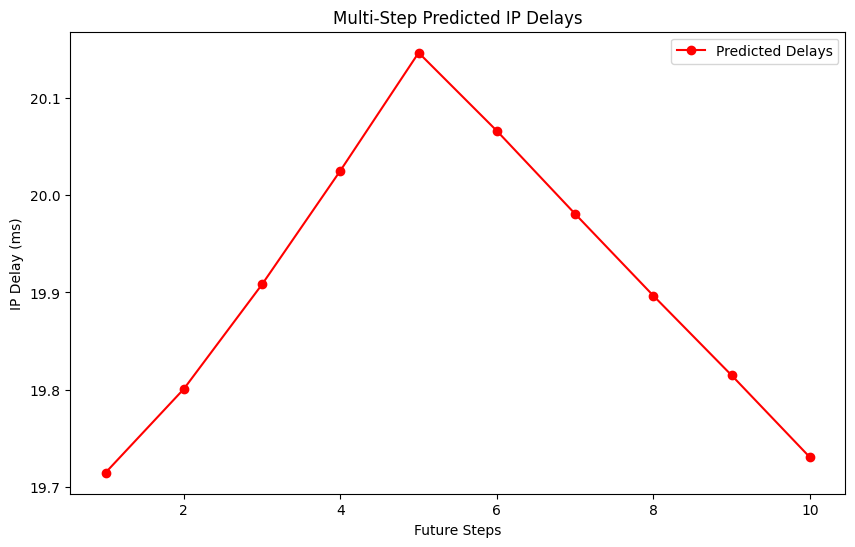

In [15]:
import matplotlib.pyplot as plt

# Plot predicted delays
plt.figure(figsize=(10, 6))
plt.plot(range(1, future_steps + 1), denormalized_predictions, marker='o', label='Predicted Delays', color='red')
plt.title('Multi-Step Predicted IP Delays')
plt.xlabel('Future Steps')
plt.ylabel('IP Delay (ms)')
plt.legend()
plt.show()


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
      SN  ...  Absolute Difference (ms)
99   100  ...                  0.111396
100  101  ...                  0.049890
101  102  ...                  0.134743
102  103  ...                  0.046373
103  104  ...                  0.128203
..   ...  ...                       ...
195  196  ...                  0.319874
196  197  ...                  0.242258
197  198  ...                  0.200774
198  199  ...                  0.300384
199  200  ...                  0.229533

[101 rows x 4 columns]


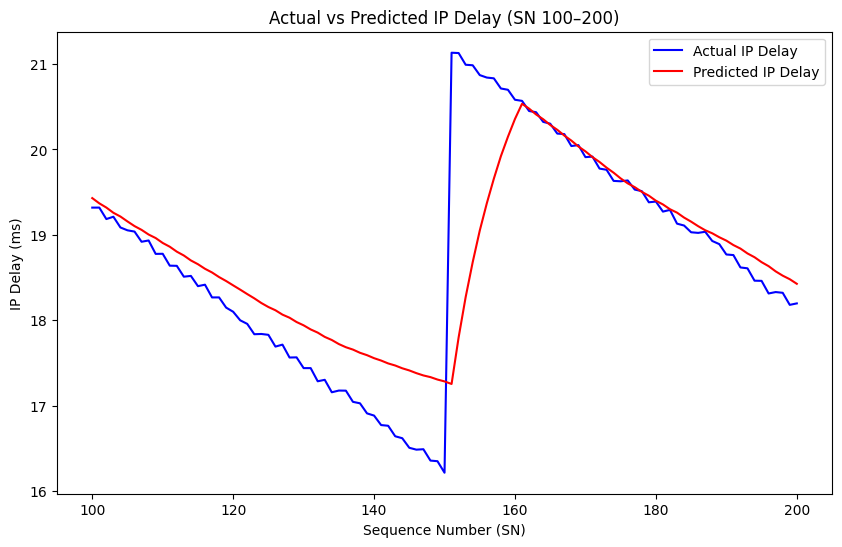

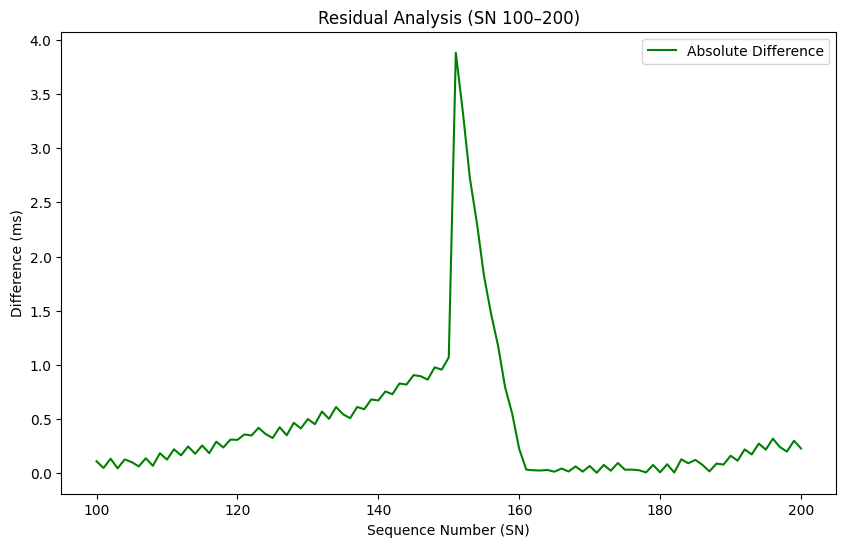

In [16]:
# Predict for all sequences in testing data
predictions = model.predict(X_test)

# Denormalize predictions
min_test = test_data['IP Delay (ms)'].min()
max_test = test_data['IP Delay (ms)'].max()
denormalized_predictions = (predictions.flatten() * (max_test - min_test)) + min_test

# Extract actual values and denormalize them
denormalized_actual = (y_test * (max_test - min_test)) + min_test

# Create a comparison table
comparison_df = pd.DataFrame({
    'SN': range(1, len(denormalized_actual) + 1),
    'Actual IP Delay (ms)': denormalized_actual,
    'Predicted IP Delay (ms)': denormalized_predictions,
    'Absolute Difference (ms)': abs(denormalized_actual - denormalized_predictions)
})

# Filter comparison_df for SN 100 to 200
filtered_df = comparison_df[(comparison_df['SN'] >= 100) & (comparison_df['SN'] <= 200)]

# Print filtered comparison
print(filtered_df)

# Optional: Save the comparison table to a CSV file
comparison_df.to_csv('comparison_results.csv', index=False)

# Plot Actual vs Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['SN'], filtered_df['Actual IP Delay (ms)'], label='Actual IP Delay', color='blue')
plt.plot(filtered_df['SN'], filtered_df['Predicted IP Delay (ms)'], label='Predicted IP Delay', color='red')
plt.xlabel('Sequence Number (SN)')
plt.ylabel('IP Delay (ms)')
plt.title('Actual vs Predicted IP Delay (SN 100–200)')
plt.legend()
plt.show()

# Plot Residuals (Absolute Difference)
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['SN'], filtered_df['Absolute Difference (ms)'], label='Absolute Difference', color='green')
plt.xlabel('Sequence Number (SN)')
plt.ylabel('Difference (ms)')
plt.title('Residual Analysis (SN 100–200)')
plt.legend()
plt.show()
